In [1]:
import numpy as np
import faiss
import pandas as pd
faiss.get_num_gpus()

1

In [2]:
#dataCap = pd.read_csv('list_cap_detail_KG_embedded_incidents.csv')
dataCap = pd.read_csv('capLabel_All_KG_embedded.csv')
dataCap.head(5)

filename  \
0                           036166_29fba09e.jpg   
1  074DF9CDDC33B3B774722C27D2B8074854000304.jpg   
2                           082001_bcd90588.jpg   
3                          1129772_a671f2ff.jpg   
4                           131590_023e94c7.jpg   

                                             caption source         target  \
0          a dog standing on the side of a dirt road    NaN      dirt road   
1  a white and black animal standing on the side ...    NaN    white  road   
2           a herd of sheep walking down a dirt road    NaN      dirt road   
3           a herd of sheep walking down a dirt road    NaN      dirt road   
4                 two sheep walking down a dirt road    NaN  two dirt road   

      edge                concat  \
0      dog         dirt road dog   
1   animal    white  road animal   
2  herd of     dirt road herd of   
3  herd of     dirt road herd of   
4    sheep   two dirt road sheep   

                                          embeded_KG  
0  [-9.78935584e-02 -2.29659036e-01 -3.02279025e-...  
1  [-8.21447521e-02 -4.99149382e-01 -6.16561532e-...  
2  [ 1.58172473e-01 -3.45849544e-01 -8.76575187e-...  
3  [ 1.58172473e-01 -3.45849544e-01 -8.76575187e-...  
4  [ 2.02556416e-01 -1.64337456e-01 -5.52113116e-...

In [3]:
dataMain = dataCap["embeded_KG"]
print(dataMain)

0        [-9.78935584e-02 -2.29659036e-01 -3.02279025e-...
1        [-8.21447521e-02 -4.99149382e-01 -6.16561532e-...
2        [ 1.58172473e-01 -3.45849544e-01 -8.76575187e-...
3        [ 1.58172473e-01 -3.45849544e-01 -8.76575187e-...
4        [ 2.02556416e-01 -1.64337456e-01 -5.52113116e-...
                               ...                        
11559    [-1.93983406e-01 -1.55499861e-01  1.38439581e-...
11560    [ 7.86004309e-03 -8.67686689e-01  6.74317777e-...
11561    [ 2.26228148e-01 -4.26946163e-01  3.31237257e-...
11562    [-2.12180018e-02 -3.20913851e-01 -8.74762759e-...
11563    [ 1.92680374e-01 -4.08267289e-01  1.33822173e-...
Name: embeded_KG, Length: 11564, dtype: object


In [4]:
listEmbed = []
for item in dataMain:
  embedReplace = item.replace('[', '').replace(']', '')
  dataArr = np.fromstring(embedReplace, dtype=float, sep=' ')
  listEmbed.append(dataArr)

In [5]:
len(listEmbed)

11564

In [6]:
listFile = dataCap["filename"]
listFile[0]

'036166_29fba09e.jpg'

In [9]:
embed_index = faiss.IndexFlatL2(768)
embed_index

<faiss.swigfaiss.IndexFlatL2; proxy of <Swig Object of type 'faiss::IndexFlatL2 *' at 0x7f97a17fa210> >

In [8]:
# make it a flat GPU index
res_gpu = faiss.StandardGpuResources()
gpu_index_flat = faiss.index_cpu_to_gpu(res_gpu, 0, embed_index)

In [10]:
listEmbedArr = np.asarray(listEmbed, dtype=np.float32)

In [11]:
gpu_index_flat.add(listEmbedArr)
gpu_index_flat.ntotal

11564

In [12]:
listEmbedArr.shape

(11564, 768)

In [13]:
test_fea = listEmbed[0]
test_fea.shape

(768,)

In [14]:
test_fea

array([-9.78935584e-02, -2.29659036e-01, -3.02279025e-01, -2.16998463e-03,
        1.48824930e-01, -1.28211260e-01, -4.97724868e-05,  7.09498882e-01,
       -2.19953373e-01, -1.13386355e-01,  8.68692808e-03, -1.18619822e-01,
        9.19058472e-02, -1.59921795e-02, -6.60758555e-01,  3.37263972e-01,
       -2.85472572e-01,  3.53994429e-01,  3.04599822e-01,  2.67305404e-01,
       -4.28375185e-01, -4.30494934e-01, -4.90628779e-01, -6.99356079e-01,
       -5.87230623e-02,  2.25834817e-01, -7.02069029e-02, -5.20439520e-02,
       -3.73817652e-01,  1.16231278e-01,  2.40527559e-02,  6.28112629e-02,
        5.19513488e-02,  1.26370370e-01, -1.70975775e-01, -5.05371332e-01,
       -3.21749479e-01,  2.64372528e-02, -3.22405875e-01,  9.12684649e-02,
       -3.08929533e-02,  1.27728373e-01,  6.24636710e-02, -1.32175654e-01,
        7.22482577e-02,  1.43352181e-01, -2.94156730e-01, -2.52031058e-01,
        3.36578973e-02, -4.68717813e-01, -1.05758281e-02,  4.58064452e-02,
       -3.78028691e-01,  

In [15]:
ass = []
ass.append(test_fea)
assArr = np.asarray(ass, dtype=np.float32)
assArr.shape

(1, 768)

In [16]:
assArr

array([[-9.78935584e-02, -2.29659036e-01, -3.02279025e-01,
        -2.16998463e-03,  1.48824930e-01, -1.28211260e-01,
        -4.97724868e-05,  7.09498882e-01, -2.19953373e-01,
        -1.13386355e-01,  8.68692808e-03, -1.18619822e-01,
         9.19058472e-02, -1.59921795e-02, -6.60758555e-01,
         3.37263972e-01, -2.85472572e-01,  3.53994429e-01,
         3.04599822e-01,  2.67305404e-01, -4.28375185e-01,
        -4.30494934e-01, -4.90628779e-01, -6.99356079e-01,
        -5.87230623e-02,  2.25834817e-01, -7.02069029e-02,
        -5.20439520e-02, -3.73817652e-01,  1.16231278e-01,
         2.40527559e-02,  6.28112629e-02,  5.19513488e-02,
         1.26370370e-01, -1.70975775e-01, -5.05371332e-01,
        -3.21749479e-01,  2.64372528e-02, -3.22405875e-01,
         9.12684649e-02, -3.08929533e-02,  1.27728373e-01,
         6.24636710e-02, -1.32175654e-01,  7.22482577e-02,
         1.43352181e-01, -2.94156730e-01, -2.52031058e-01,
         3.36578973e-02, -4.68717813e-01, -1.05758281e-0

In [17]:
test_fea = assArr
D, I = gpu_index_flat.search(test_fea, k=100)
#result_ids = f_ids[0][1:]

In [18]:
test_fea.shape

(1, 768)

In [19]:
print(I)

[[    0  1682  1257  5738  9125  1609  5671   694  1745  5969  7768  1674
   2330   178    58   143  2113  2116  2105  4282  5902  9434  1391  9442
   1417  1603  5713  9025   688 10488  9741  5767 10748  2158  7360  8725
    981   119  1939  2066  5758  1906  1532  1772  2086  9663  9591  1996
   9361  2072  9633  1703  9484  3079  3233  2732  5823  5501  5764  2204
   1321  1572  1818  9521  9702  1477  1857  1523  1776  1470  9507  1667
   2111  1838  3272  2006  1744 10480  2056    53    89  5916  1272  1747
   9531  1972 10073  1773    33  1790  5820  5804  1454  1427  1489  1604
      4  2035  9573  1339]]


In [20]:
I[0][0]

0

In [22]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [23]:
listCap = dataCap["caption"]
listCap

0                a dog standing on the side of a dirt road
1        a white and black animal standing on the side ...
2                 a herd of sheep walking down a dirt road
3                 a herd of sheep walking down a dirt road
4                       two sheep walking down a dirt road
                               ...                        
11559    a car parked on the side of a road next to a tree
11560              a bus is parked on the side of the road
11561        a fire truck is parked next to a pile of logs
11562          a street scene with focus on a street light
11563               a flooded street with trees and shrubs
Name: caption, Length: 11564, dtype: object

In [24]:
listCap[0]

'a dog standing on the side of a dirt road'

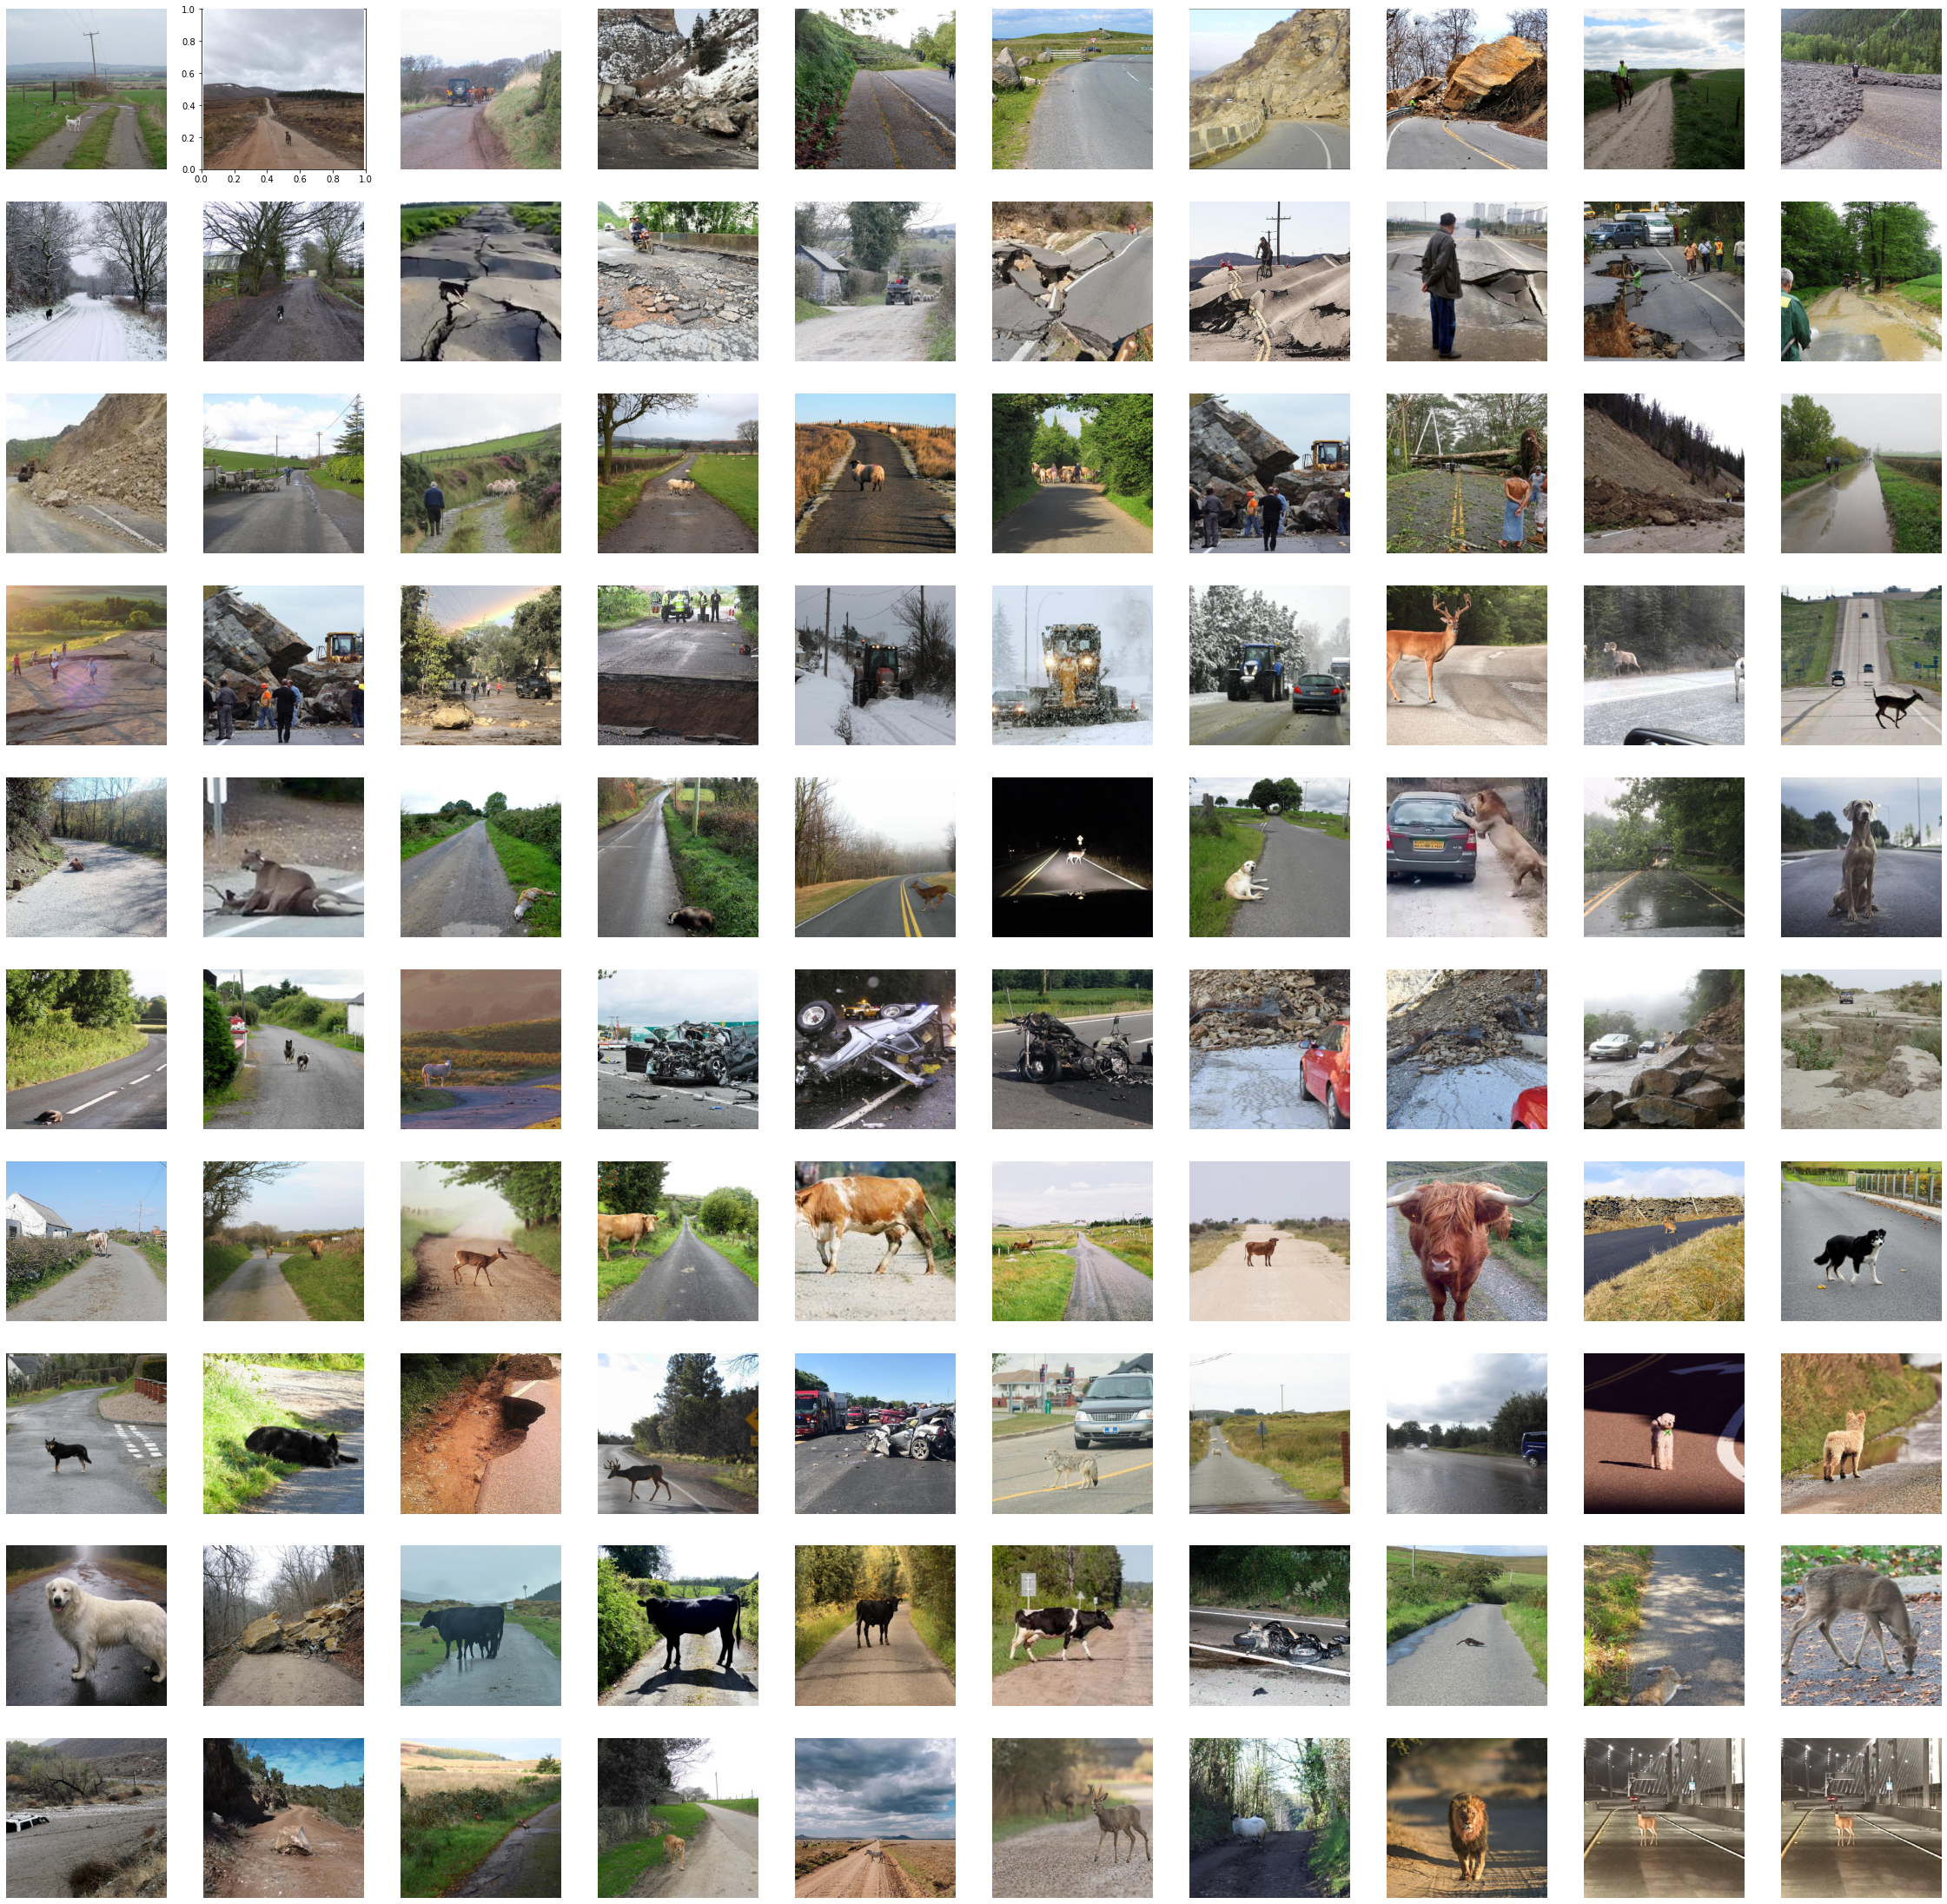

In [26]:
fig = plt.figure(figsize=(40,40))
rows = 10
columns = 10
fig.add_subplot(rows, columns, 2)
for i in range(100):
    indexIm = I[0][i]
    im = mpimg.imread("static/dataset/" + listFile[indexIm])
    fig.add_subplot(rows, columns, i + 1)
    imgplot = plt.imshow(im)
    plt.axis('off')
